# Decision Tree Machine Learning Model 💻 🧠

---



## Overview

**Decision Tree (DT) is a supervised machine learning algorithm used for both classification and regression tasks. It splits data into branches based on feature values to make predictions.**  

<br>

---

<br>

**Definition**  
A Decision Tree is a flowchart-like model where data is split into smaller subsets based on feature conditions. The structure consists of:  

* **Root Node**: The starting point that represents the entire dataset.  
* **Decision Nodes**: Points where the data is split based on a feature.  
* **Leaves**: Terminal nodes that provide the final prediction.  

For **classification**, a Decision Tree assigns class labels based on feature splits.  
For **regression**, it predicts continuous values using the average or mean of data points in each leaf.  

<br>

---

<br>

**Key Concepts**
1. **Splitting Criteria**:  
   - Determines how the dataset is divided at each step.  
   - Common methods:
     * **Gini Impurity** (Classification) – Measures the likelihood of incorrect classification.  
     * **Entropy** (Classification) – Uses information gain to decide splits.  
     * **Mean Squared Error (MSE)** (Regression) – Measures variance within nodes.  

2. **Tree Depth & Overfitting**:  
   - **Deeper trees** fit training data better but may overfit.  
   - **Pruning** (removing unnecessary branches) improves generalization.  

3. **Feature Importance**:  
   - Decision Trees rank features by their impact on predictions.  
   - Helps in feature selection for other models.  

4. **Handling Missing Data**:  
   - Some implementations allow surrogate splits to handle missing values.  

<br>

---

<br>

**Pros**
1. **Easy to Understand & Interpret** – Can be visualized as a simple flowchart.  
2. **No Need for Feature Scaling** – Works with both categorical and numerical features.  
3. **Handles Non-Linearity** – Can model complex relationships without requiring transformation.  
4. **Fast for Small Datasets** – Training and inference are relatively quick.  

<br>

---

<br>

**Cons**
1. **Prone to Overfitting** – Deep trees can memorize training data, reducing generalization.  
2. **Unstable to Small Changes** – Small variations in data can change the tree structure significantly.  
3. **Less Efficient on Large Datasets** – Computationally expensive for large datasets.  

<br>

---

<br>

**Tips**
* **Limit Tree Depth** – Use `max_depth` to prevent overfitting.  
* **Pruning Techniques** – Use pre-pruning (`max_leaf_nodes`) or post-pruning to remove unnecessary branches.  
* **Use Feature Importance** – Identify the most influential features and remove irrelevant ones.  
* **Consider Ensemble Methods** – Random Forest or Gradient Boosting improve Decision Trees by reducing variance.  

<br>


---

<br>

**Useful Articles and Videos**
* https://www.datacamp.com/tutorial/decision-tree-classification-python
* https://www.ibm.com/think/topics/decision-trees
* https://www.youtube.com/watch?v=6DlWndLbk90
* https://www.youtube.com/watch?v=ZOiBe-nrmc4


<br>

## Import Data/Libraries

In [ ]:
!pip install lets_plot

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 19.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 332.3/332.3 kB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.1/58.1 kB 3.3 MB/s eta 0:00:00


In [ ]:
# needed libraries for Decision Tree models
import pandas as pd
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, recall_score, precision_score
from sklearn.model_selection import cross_val_score,  train_test_split , KFold
from sklearn.preprocessing import StandardScaler, Normalizer
import lets_plot as lp
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# foundation dataset
titanic_df = pd.read_csv('https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv')

# stretch dataset
cleveland_df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data', header=None)
hungarian_df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.hungarian.data', header=None)
switzerland_df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.switzerland.data', header=None)

## Explore, Visualize and Understand the Data

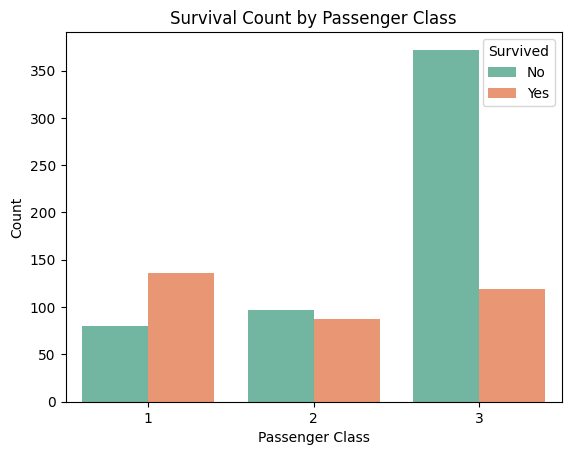

In [ ]:
sns.countplot(data=titanic_df, x="Pclass", hue="Survived", palette="Set2")
plt.title("Survival Count by Passenger Class")
plt.xlabel("Passenger Class")
plt.ylabel("Count")
plt.legend(title="Survived", labels=["No", "Yes"])
plt.show()

In [ ]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
import numpy as np
from lets_plot import *
LetsPlot.setup_html()
ggplot(mapping=aes(x='Pclass', fill='Survived'), data=titanic_df) + geom_bar()

## Feature Enginnering and Data Augmentation

### **Data Augmentation**  
**Definition:**
Data augmentation is the process of artificially expanding the size and diversity of a training dataset by applying transformations or modifications to the existing data while preserving the underlying labels or structure. It is commonly used in machine learning, especially in computer vision and natural language processing, to improve model performance and robustness.

### **Feature Engineering**  
**Definition:**
Feature engineering is the process of creating, modifying, or selecting relevant features (input variables) from raw data to improve the performance of a machine learning model. It involves transforming raw data into a format that makes it more suitable for algorithms to learn patterns.


In [ ]:
conditions = [
    titanic_df["Name"].str.contains(r'(?i)(Mr)|(Mrs)|(Ms)|(Miss)|(Mlle)', na=False),  # Condition 1: If "Name" contains "Mr"
    titanic_df["Name"].str.contains(r'(?i)(Rev)|(Dr)|(General)|(Col)|(Major)|(Capt)', na=False), # Condition 2: If "Name" contains "Mrs"
    titanic_df["Name"].str.contains(r'(?i)(Master)|(Countess)|(Jonkheer)|(Don)', na=False) # Condition 3: If "Name" contains "Miss"
]

outputs = [
    1,
    2,
    3
]

titanic_df["Name_group"] = np.select(conditions, outputs, default=5)

<ipython-input-6-1b68d7e0032b>:2: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  titanic_df["Name"].str.contains(r'(?i)(Mr)|(Mrs)|(Ms)|(Miss)|(Mlle)', na=False),  # Condition 1: If "Name" contains "Mr"
<ipython-input-6-1b68d7e0032b>:3: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  titanic_df["Name"].str.contains(r'(?i)(Rev)|(Dr)|(General)|(Col)|(Major)|(Capt)', na=False), # Condition 2: If "Name" contains "Mrs"
<ipython-input-6-1b68d7e0032b>:4: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  titanic_df["Name"].str.contains(r'(?i)(Master)|(Countess)|(Jonkheer)|(Don)', na=False) # Condition 3: If "Name" contains "Miss"


## Machine Learning Model: Decision Tree

### Split the data

In [ ]:
# Fitting the model
titanic_df2 = pd.get_dummies(titanic_df, columns=['Sex', 'Embarked', 'Name', 'Fare', 'Ticket', 'Cabin'], drop_first=True)

In [ ]:
X = titanic_df2.drop('Survived', axis=1)
y = titanic_df2['Survived']

### Create the model

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
y.head()

,Survived
0,0
1,1
2,1
3,1
4,0


### Train the model

### Make predictions

In [ ]:
titanic_df2.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Name_group,Sex_male,Embarked_Q,Embarked_S,...,Cabin_E8,Cabin_F E69,Cabin_F G63,Cabin_F G73,Cabin_F2,Cabin_F33,Cabin_F38,Cabin_F4,Cabin_G6,Cabin_T
0,1,0,3,22.0,1,0,1,True,False,True,...,False,False,False,False,False,False,False,False,False,False
1,2,1,1,38.0,1,0,1,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,3,1,3,26.0,0,0,1,False,False,True,...,False,False,False,False,False,False,False,False,False,False
3,4,1,1,35.0,1,0,1,False,False,True,...,False,False,False,False,False,False,False,False,False,False
4,5,0,3,35.0,0,0,1,True,False,True,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
# Predicting the Test set results
DT = DecisionTreeClassifier()
DT.fit(X_train, y_train)

DecisionTreeClassifier()

In [ ]:
y_pred = DT.predict(X_test)

### Evaluate the Model

**Accuracy – The percentage of total predictions that are correct.**  
Example: If a spam filter correctly classifies 90 out of 100 emails (whether spam or not), the accuracy is 90%.  

**F1 Score  – Out of all the positive predictions, how many were actually correct.**  
Example: If a spam filter predicts 20 emails as spam, but only 15 are actually spam, precision is 15/20 = 75%.  


**Recall Score – Out of all the actual positive cases, how many did the model correctly identify.**  
Example: If there were 25 spam emails in total, and the model correctly identified 15 of them, recall is 15/25 = 60%.  

**Precision Score – A balance between precision and recall (harmonic mean).**  
Example: If precision is 75% and recall is 60%, F1 score is (2 × 75 × 60) / (75 + 60) = 66.7%.  



Accuracy: 82.68 %.
F1 Score: 0.82 %.
Recall Score: 0.83 %.
Precision Score: 0.83 %.

In [ ]:
# Accuracy, F1 Score, Recall score, Precision score
accuracy = accuracy_score(y_test, y_pred)*100
f1_score = f1_score(y_test, y_pred, average='weighted')
recall_score = recall_score(y_test, y_pred, average='weighted')
precision_score = precision_score(y_test, y_pred, average='weighted')

print('Accuracy: ' + str(round(accuracy, 2)) + ' %.')
print('F1 Score: ' + str(round(f1_score, 2)) + ' %.')
print('Recall Score: ' + str(round(recall_score, 2)) + ' %.')
print('Precision Score: ' + str(round(precision_score, 2)) + ' %.')

Accuracy: 82.12 %.
F1 Score: 0.82 %.
Recall Score: 0.82 %.
Precision Score: 0.82 %.


# Random Forest Model

## Overview of Random Forests



**Random Forest (RF) is a supervised machine learning algorithm used for both classification and regression tasks. It builds multiple decision trees and combines their outputs for better accuracy and stability.**

<br>

**Definition**  
A Random Forest is an ensemble learning method that creates a "forest" of decision trees during training. Instead of relying on a single tree, Random Forest combines the predictions of multiple trees to improve performance. The structure consists of:

- Decision Trees: Individual trees that make predictions based on subsets of data and features.
- Bagging (Bootstrap Aggregating): Each tree is trained on a randomly sampled subset of the data.
- Voting/Averaging: Combines the predictions from all trees:
- For classification, the majority vote decides the class.
- For regression, the average of all tree predictions is used.  
Random Forest reduces the risk of overfitting compared to individual decision trees and works well for both categorical and numerical data.

<br>

**Key Concepts**

1. Bagging:
  - Random Forest uses bootstrapping to train each tree on a different sample of the data.
  - This creates diversity among trees, making the model more robust.
2. Feature Randomness:
  - At each split, Random Forest considers a random subset of features rather than all features.
  - This reduces correlation between trees and improves generalization.
3. Out-of-Bag (OOB) Error:
  - Trees not trained on certain data points (left out during bootstrapping) can be used to validate the model.
  - OOB error gives an unbiased estimate of model performance.
4. Feature Importance:
  - Random Forest provides a ranking of feature importance based on how often features are used for splitting across trees.
  - Useful for identifying key predictors in your data.
<br>

**Pros**

Improved Accuracy – Combines multiple trees, reducing overfitting.
Robust to Noise – Handles outliers and noisy data better than individual trees.
Handles Large Datasets – Can scale well with more data.
Feature Selection – Provides insights into the importance of features.
No Need for Feature Scaling – Works with unscaled data, both numerical and categorical.
<br>

**Cons**

Less Interpretable – Harder to visualize compared to a single decision tree.
Computationally Intensive – Training many trees can take time and memory for large datasets.
Overfitting Risk with Too Many Trees – Although rare, excessive trees might still overfit without tuning.
Slower Inference – Predictions may take longer because they aggregate results from multiple trees.
<br>

**Tips**

* Tune n_estimators – Adjust the number of trees to balance accuracy and computational cost.
* Limit Tree Depth – Use max_depth to avoid overfitting while maintaining performance.
* Optimize Feature Subset Size – Use max_features to control how many features each tree considers at a split.
* Use Feature Importance – Rank and prioritize the most important features in your dataset.
* Combine with Other Methods – Random Forest pairs well with techniques like PCA for dimensionality reduction.
<br>

**Useful Articles and Videos**

https://www.datacamp.com/tutorial/random-forests-classifier-python  
https://www.ibm.com/topics/random-forest  
https://www.youtube.com/watch?v=J4Wdy0Wc_xQ    
https://www.youtube.com/watch?v=QHOazyP-YlM

<br>


In [ ]:
from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

### Create Model

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Train Model

In [ ]:
y.head()

,Survived
0,0
1,1
2,1
3,1
4,0


### Make Predictions

In [ ]:
# Predicting the Test set results
RF = RandomForestClassifier()
RF.fit(X_train, y_train)

RandomForestClassifier()

### Hyperparameter Search

In [ ]:
y_pred = RF.predict(X_test)

### Evaluate the Model

In [ ]:
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score

# Assuming y_test and y_pred are defined somewhere in your code
accuracy = accuracy_score(y_test, y_pred) * 100
f1_value = f1_score(y_test, y_pred, average='weighted') * 100
recall_value = recall_score(y_test, y_pred, average='weighted') * 100
precision_value = precision_score(y_test, y_pred, average='weighted') * 100

print('Accuracy: ' + str(round(accuracy, 2)) + ' %.')
print('F1 Score: ' + str(round(f1_value, 2)) + ' %.')
print('Recall Score: ' + str(round(recall_value, 2)) + ' %.')
print('Precision Score: ' + str(round(precision_value, 2)) + ' %.')


Accuracy: 81.56 %.
F1 Score: 80.97 %.
Recall Score: 81.56 %.
Precision Score: 82.44 %.
